## Absorbing Markov Chain 
##### Keywords: Linear algebra, Markov Chain

In [3]:
%matplotlib inline
import numpy as np
from numpy import linalg as lin
import os


In [4]:

## store current working directory
cwd      = os.getcwd() 

## where we store data files
datapath = cwd + u'/data/'

### Consider a rat in a maze with 3 cells, indexed as 1,2,3 and the outside (freedom), indexed by 4 (that can only be reached via cell 3). 
### The rat starts initially in a given cell and then takes a move to another cell, continuing to do so until finally reaching freedom. 

### Goal: simulate rat moving around and count steps it takes to get to freedom
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


In [1]:
S = [1,2,3,4]
import random
import numpy as np

################################################
## start moving from location i, 
## number of steps it takes to get to freedom
## recursion
##############################################
def steps(i):
    print(i,'->')
    if(i==1):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 2):
        next_move = random.choice([1,3,4])
        return 1+steps(next_move)
        
    if(i == 3):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 4):
        return 0


### I want to count in general, 
### on average how many steps it takes to start from cell 2 and ends with freedom
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


In [5]:
## Run N = 100 times, each time compute average of 50 moves


start move from cell 1


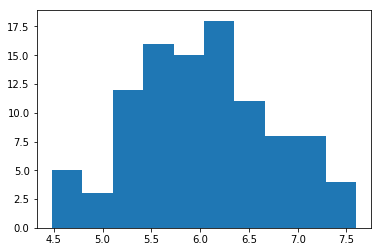

6.0276
start move from cell 2


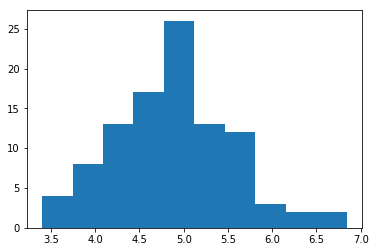

4.8844
start move from cell 3


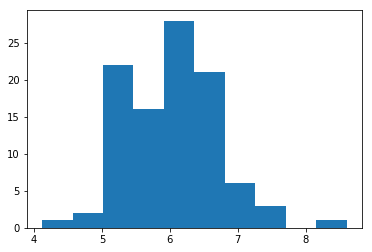

6.0388


In [4]:
import matplotlib.pyplot as plt

for start in [1,2,3]:
    Run_total = np.zeros(100)
    N_move    = 50
    print("start move from cell", start)
    for each_run in range(100):
        move = np.zeros(N_move)
        for each_move in range(N_move):
            move[each_move] = steps(start)
        Run_total[each_run] = np.mean(move)
    plt.hist(Run_total,bins = 10)
    plt.show()
    print(Run_total.mean())


### We can also look at the 1-step transition matrix associated with this problem
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>

We have the following:
$$
P = \begin{pmatrix}
0 & 1 & 0 & 0\\
1/3 & 0 & 1/3 & 1/3\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$$

Then we can set up the canonical form we dicussed in class on Tuesday:
$\begin{pmatrix}
Q &| &R\\
O &| &I\\
\end{pmatrix}$

In [5]:

# Transition matrix
S = [1,2,3,4]
P = np.array(
[[0,1,0,0],
 [1/3,0,1/3,1/3],
 [0,1,0,0],
 [0,0,0,1]
]
)
print(P)

[[ 0.          1.          0.          0.        ]
 [ 0.33333333  0.          0.33333333  0.33333333]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [6]:
## We have ONE absorption state
##############################

N_absorption = 1 


## Q is the upper left square matrix of size
## 4-1 by 4-1
##############################
Q = P[:len(S)-1,:len(S)-1]
print(Q)

## R is the upper left square matrix of size
## 4-1 by 4-1
##############################
R = P[:len(S)-1,len(S)-1:]
print(R)

## We need to find N = (I - Q)^(-1)
##############################
diff = np.matrix(np.eye(4-1)-Q)
print(diff,type(diff))
N    = diff**(-1)

[[ 0.          1.          0.        ]
 [ 0.33333333  0.          0.33333333]
 [ 0.          1.          0.        ]]
[[ 0.        ]
 [ 0.33333333]
 [ 0.        ]]
[[ 1.         -1.          0.        ]
 [-0.33333333  1.         -0.33333333]
 [ 0.         -1.          1.        ]] <class 'numpy.matrixlib.defmatrix.matrix'>


###  the expected time of being absorbed is Nc
where $c = (1,1,...,1)^T$
### The probability of being absorbed by one of the absorption states is
NR

In [7]:
c = np.zeros((len(N),1))+1
Tabs = N*c
Pabs = N*R
print("Time to absorption is:\n ", Tabs)
print("probability to absorption is:\n", Pabs)

Time to absorption is:
  [[ 6.]
 [ 5.]
 [ 6.]]
probability to absorption is:
 [[ 1.]
 [ 1.]
 [ 1.]]


### Drunkard's examples
<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>

similar as before, we can define "steps" and "canonical forms"

###### Goal: simulate drunkard's moves and count steps it takes to get to freedom


In [11]:
S = [0,1,2,3,4]
def steps_drunkard(i):
    #print(i,'->')
    if(i==3 or i==4):
        return 0
    if(i == 0):
        next_move = np.random.choice([3,1])
        return 1+ steps_drunkard(next_move)
    if(i == 1):
        next_move = np.random.choice([0,2])
        return 1+ steps_drunkard(next_move)        
    if(i == 2):
        next_move = np.random.choice([1,4])
        return 1+ steps_drunkard(next_move)   

steps_drunkard(1)

4

<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>
### I want to count in general, on average how many steps it takes to start from a block  and ends with home or bar


In [12]:
N_exp         = 100
N_simulations = 50
N_s           = 5
experiments = np.zeros((N_s,N_exp))

for block in S:
    for i in range(N_exp):
        each_experiment = np.zeros(N_simulations)
        for j in range(N_simulations):
            each_experiment[j] = steps_drunkard(block)
    
        experiments[block,i] = np.mean(each_experiment)


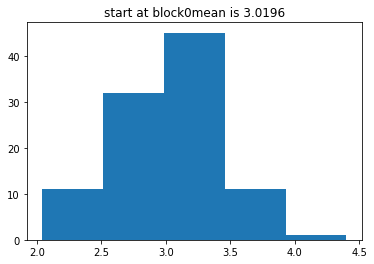

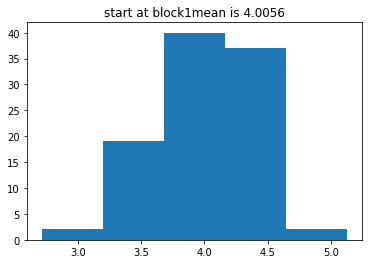

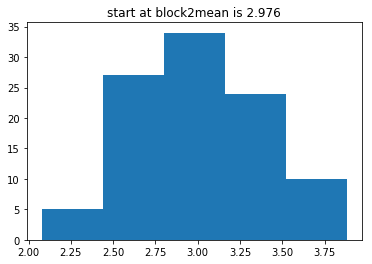

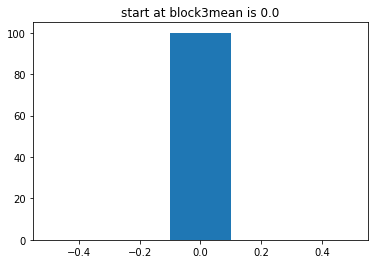

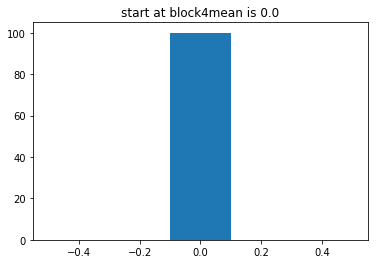

In [18]:
import matplotlib.pyplot as plt

for block in S:
    plt.hist(experiments[block,:],bins = 5)
    plt.title('start at block' + str(block)+'mean is ' + str(np.mean(experiments[block,:])))
    plt.show()

<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>


### Now the question remains: given a matrix $A$, in general, how to determine if it is a transition matrix for an absorbing Markov Chain?
To be a transition matrix $A$ needs to satisfy:
 1. $A$ needs to be square matrix
 1. $A$ needs to have all entries $\in[0,1]$ 
 1. Each row of $A$ should have summation 1

Then to be an absorbing Markov Chain's transition matrix, $A$ needs to satisfy:
1. $A$ has absorption state(s)
1. For all other states, there exist at least one path from that state to some absorption states

First, let's write out a function to determine if a matrix is Markov
To be a transition matrix $A$ needs to satisfy:
 1. $A$ needs to be square matrix
 1. $A$ needs to have all entries $\in[0,1]$ 
 1. Each row of $A$ should have summation 1

In [11]:
def if_markov(A):
    ##$A$ needs to be square matrix
    ##################################
    shape = A.shape
    if(len(shape)!=2): ## cannot be an m by n by r matrix
        print('shape wrong')
        return False
    
    if(shape[0] != shape[1]): ## need to be square matrix
        print('shape wrong')
        return False
    
    ## $A$ needs to have all entries \in[0,1] 
    ## np.all -- if all values inside are True
    ## np.logical_and -- compare entrywise logical and
    ################################################
    val = np.all(np.logical_and(A >= 0,A<=1))
    if(val!=True):
        print('not 0 1')
        return False
    
    ## Each row of $A$ should have summation 1
    ################################################
    rsum = np.round(A.sum(axis = 1),5)
    val = np.all(rsum == 1.0)

    return val


Then to be an absorbing Markov Chain's transition matrix, $A$ needs to satisfy:
1. $A$ has absorption state(s)
1. For all other states, there exist at least one path from that state to some absorption states

In [22]:
def swap(A,i,j):
    ## swap position of i,j row and columes of A
    r = np.copy(A[j,:])
    A[j,:] = A[i,:]
    A[i,:] = r
    
    c = np.copy(A[:,j])
    A[:,j] = A[:,i]
    A[:,i] = c
    

## return value is the number of absorption states
def if_absmarkov(A):
    
    ## determine A is markov
    ##################################

    
    ## determine if diagonal has 1.
    ## np.any: return if there is at least one True
    ##################################

    
    ## Now we need to transform 
    ## A into the canonical form
    ##################################

    
    ## Check if A is already in canonical form
    ##########################################

    
        
    ## Transform A into canonical form
    ##########################################        

    
            
    ## For the canonical form, we can try to see if 
    ## the upper left Q, if (I-Q) is invertible,
    ## That is to see if all eigenvalues of (I-Q) are nonzero
    ##########################################  

    


## Once A is transformed into canonical form, we can compute the time to absorption and probability to be absorbed by each state